In [171]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fires = gpd.read_file('./data/fires.geojson')

In [3]:
fires.to_feather('./data/fires.geofeather')

In [15]:
fire_incidents = gpd.read_file('./data/Fire Incidents.geojson')

In [16]:
fire_incidents.to_feather('./data/fire_incidents.geofeather')

# Get accidental fires

In [153]:
building_fires = fire_incidents[fire_incidents.primary_situation.str.contains('Building fire').astype(bool)]

In [159]:
building_fires.shape

(7865, 64)

In [160]:
accidents = building_fires.loc[building_fires.ignition_cause.str.contains('Intentional') | 
                               building_fires.ignition_cause.isna(),:]

In [126]:
#Property loss = Estimated monetary loss of property due to damage from incident (structure)


In [192]:
accidents = accidents[['geometry', 'number_of_floors_with_significant_damage', 
                       'number_of_floors_with_heavy_damage', 'number_of_floors_with_extreme_damage',
                       'address', 'property_use', 'estimated_contents_loss',
                       'estimated_property_loss', 'alarm_dttm', 'incident_date',
                       'number_of_floors_with_minimum_damage', 'number_of_alarms',
                       'civilian_injuries']]

In [179]:
numeric_cols = ['number_of_floors_with_minimum_damage', 'number_of_alarms',
                'civilian_injuries', 'estimated_contents_loss',
                'estimated_property_loss', 'number_of_floors_with_significant_damage', 
                'number_of_floors_with_heavy_damage', 'number_of_floors_with_extreme_damage',]

In [181]:
accidents[numeric_cols] = accidents[numeric_cols].astype(float)

In [188]:
accidents = accidents[(accidents.estimated_property_loss > 0)].copy()

In [189]:
accidents['year'] = accidents.incident_date.dt.year

In [190]:
accidents.to_feather('./data/clean_accidental_fires.geofeather')

(array([ 13.,   6., 115., 277., 211., 118., 106.,  54.,  20.,   5.]),
 array([0.30103   , 0.98298439, 1.66493879, 2.34689319, 3.02884758,
        3.71080198, 4.39275638, 5.07471077, 5.75666517, 6.43861957,
        7.12057396]),
 <BarContainer object of 10 artists>)

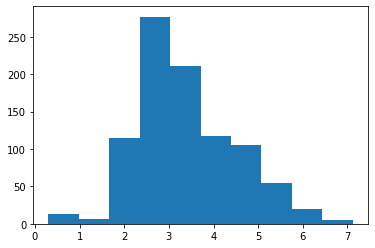

In [191]:
plt.hist(np.log10(1 + accidents.estimated_property_loss.astype(float)))

### Clean police data

In [4]:
police = gpd.read_file('./data/police.geojson')

In [5]:
police.to_feather('./data/police.geofeather')

In [ ]:
police['SUICIDE']

In [200]:
suicide_attempts = police[police.descript.str.contains('ATTEMPTED SUICIDE')].copy()

In [204]:
murder_attempts = police[police.descript.str.contains('ATTEMPTED HOMICIDE')].copy()

In [217]:
death_reports = police[police.descript.str.contains('DEATH REPORT')].copy()

In [221]:
suicides = police[police.descript.str.contains('SUICIDE') 
                  & ~police.descript.str.contains('ATTEMPTED SUICIDE')].copy()

In [229]:
suicides.columns

Index(['descript', 'x', 'y', 'pdid', 'date', 'resolution', 'dayofweek',
       'incidntnum', 'address', 'category', 'time', 'pddistrict',
       'incident_code', 'geometry'],
      dtype='object')

In [232]:
death_reports = death_reports.drop(columns=['x', 'y', 'pdid', 'resolution', 'dayofweek', 
                                            'incidntnum', 'category', 'time', 'pddistrict', 'incident_code'])

In [233]:
suicides = suicides.drop(columns=['x', 'y', 'pdid', 'resolution', 'dayofweek', 
                                  'incidntnum', 'category', 'time', 'pddistrict', 'incident_code'])

In [238]:
suicides['year'] = suicides['date'].dt.year

In [239]:
death_reports['year'] = death_reports['date'].dt.year

In [240]:
death_reports.to_feather('./data/death_reports.geofeather')

In [241]:
suicides.to_feather('./data/suicides.geofeather')

In [242]:
suicides.columns

Index(['descript', 'date', 'address', 'geometry', 'year'], dtype='object')